# TITANIC SURVIVAL PREDICTION

> Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

> The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
LabelEncoder = LabelEncoder()
standard_scale = StandardScaler()

In [3]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold,LeaveOneOut
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,accuracy_score
from sklearn import metrics,tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Exploratory Data Analysis

In [4]:
df = pd.read_csv("tested.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Cleaning

In [8]:
df.duplicated().sum()

0

##### There is no duplication in dataset.

##### Dropped features such as 'Cabin',because either they aren't valuable for predicting  or having major missing values.

In [9]:
df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1, inplace=True)

# Descriptive Statistics

In [10]:
df_num = df.select_dtypes(exclude='object')
df_cat = df.select_dtypes(include='object')

In [11]:
df_num.std()

Survived     0.481622
Pclass       0.841838
Age         14.181209
SibSp        0.896760
Parch        0.981429
Fare        55.907576
dtype: float64

##### Remove Variables with Low Standard Deviation

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.0,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.0,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.0,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.0,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.0,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.5,512.3292


In [13]:
df.describe(include=object).T

,count,unique,top,freq
Sex,418,2,male,266
Embarked,418,3,S,270


In [14]:
df_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,34.5,0,0,7.8292
1,1,3,47.0,1,0,7.0000
2,0,2,62.0,0,0,9.6875
3,0,3,27.0,0,0,8.6625
4,1,3,22.0,1,1,12.2875


In [15]:
df_cat.head()

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S


##### There are 2 categorical variables and 6 numerical variables.

# Univariate Analysis

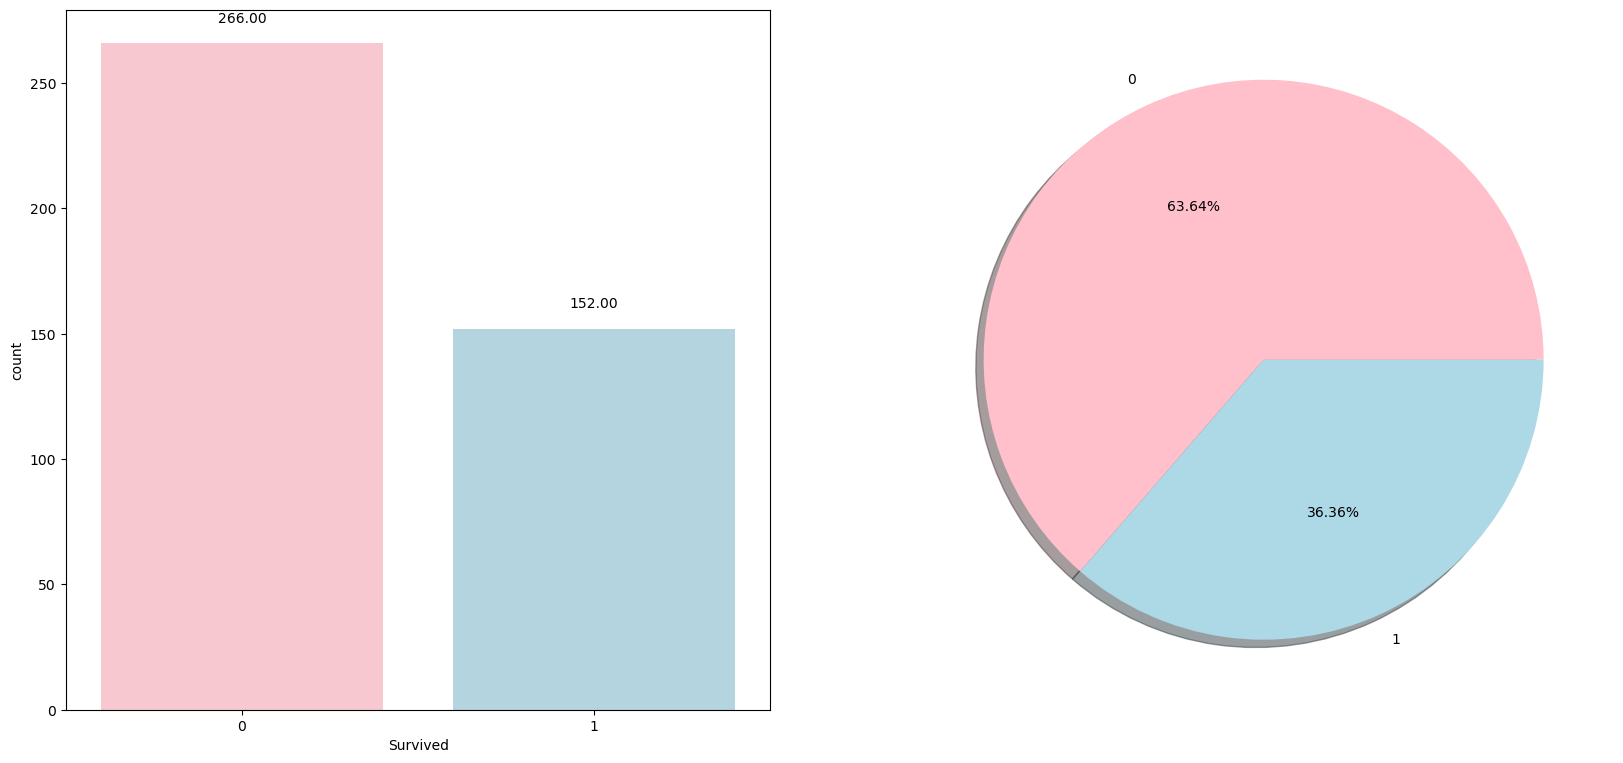

In [16]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
ax = sns.countplot(x='Survived',data=df,palette=['pink','lightblue'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2. , p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')
plt.subplot(2,2,2)
Values  = df["Survived"].value_counts().values
Lables  = df["Survived"].value_counts().index
plt.pie(Values,labels=Lables,autopct='%.2f%%',shadow=True,colors=["pink",'lightblue'])
plt.show() 

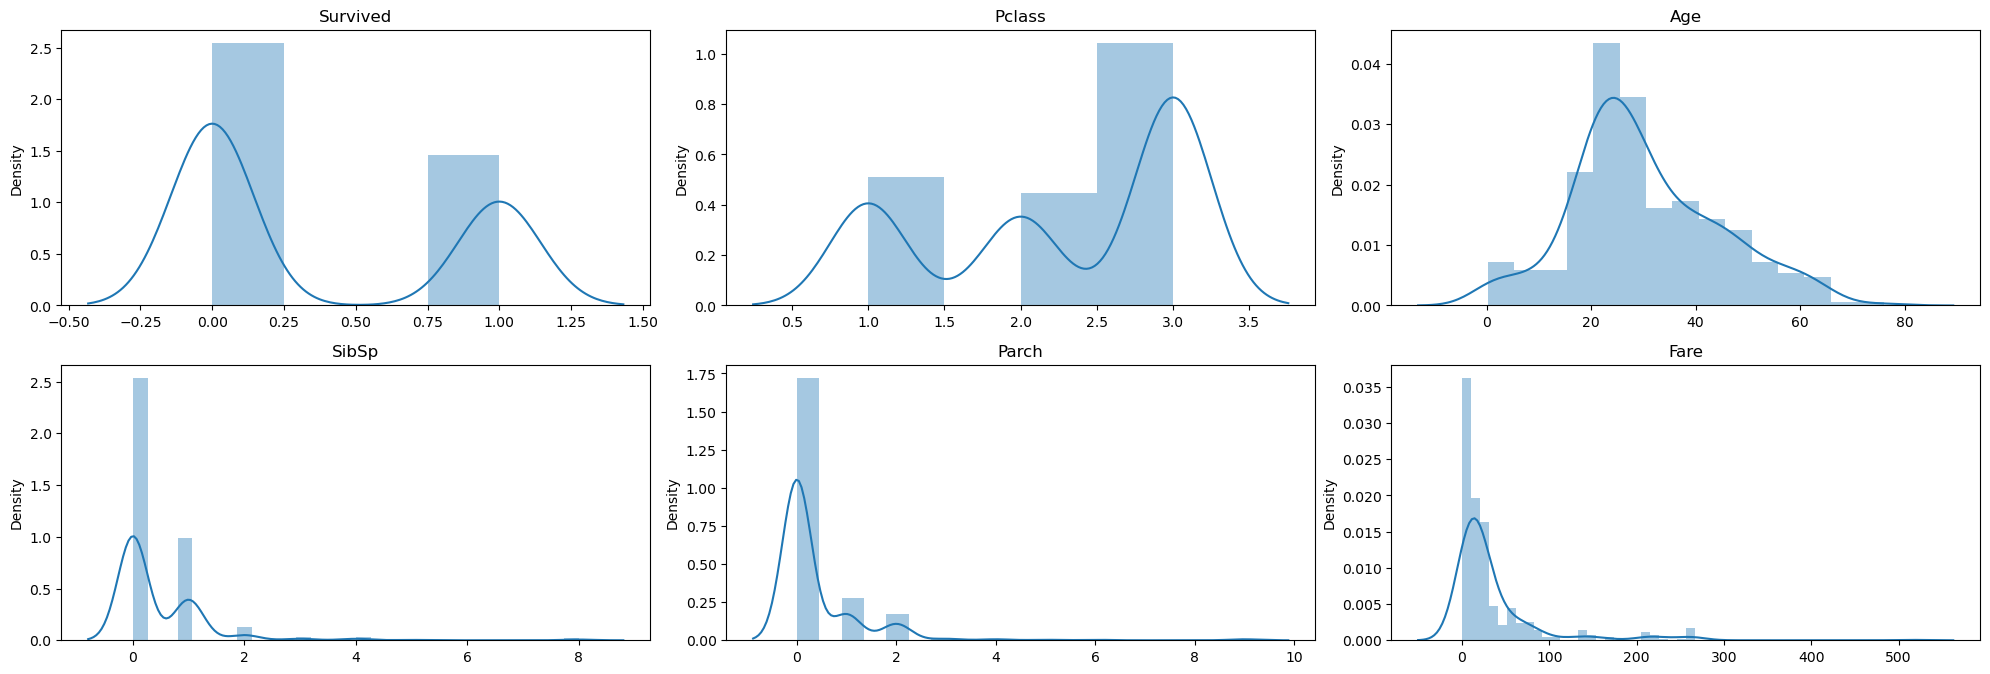

In [17]:
columns_to_plot = df_num.columns
plt.figure(figsize=(20,20))
for i,col_name in enumerate(columns_to_plot,1):
    plt.subplot(6,3,i)
    sns.distplot(x=df_num[col_name])
    plt.title(col_name)
plt.tight_layout()
plt.show()

In [18]:
df_num.skew()

Survived    0.568991
Pclass     -0.534170
Age         0.457361
SibSp       4.168337
Parch       4.654462
Fare        3.687213
dtype: float64

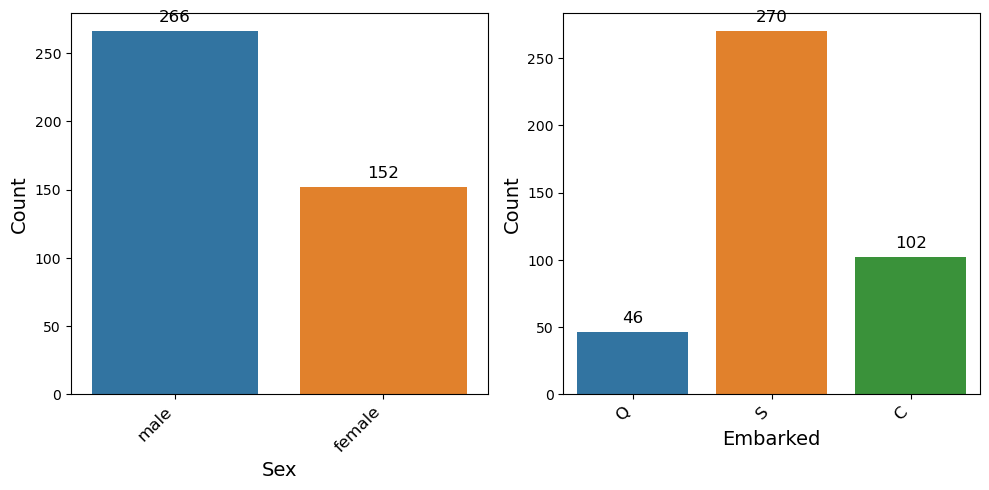

In [19]:
data_cat = df_cat.columns
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5)) 

for variable, subplot in zip(data_cat, ax.flatten()):
    z = sns.countplot(x=df_cat[variable], ax=subplot) 
    z.set_xlabel(variable, fontsize=14)
    z.set_ylabel('Count', fontsize=14)
    z.set_xticklabels(z.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
    
    
    for p in subplot.patches:
        subplot.annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points',
                         fontsize=12)
plt.tight_layout()
plt.show()

# Bivariate and Multivariate Analysis

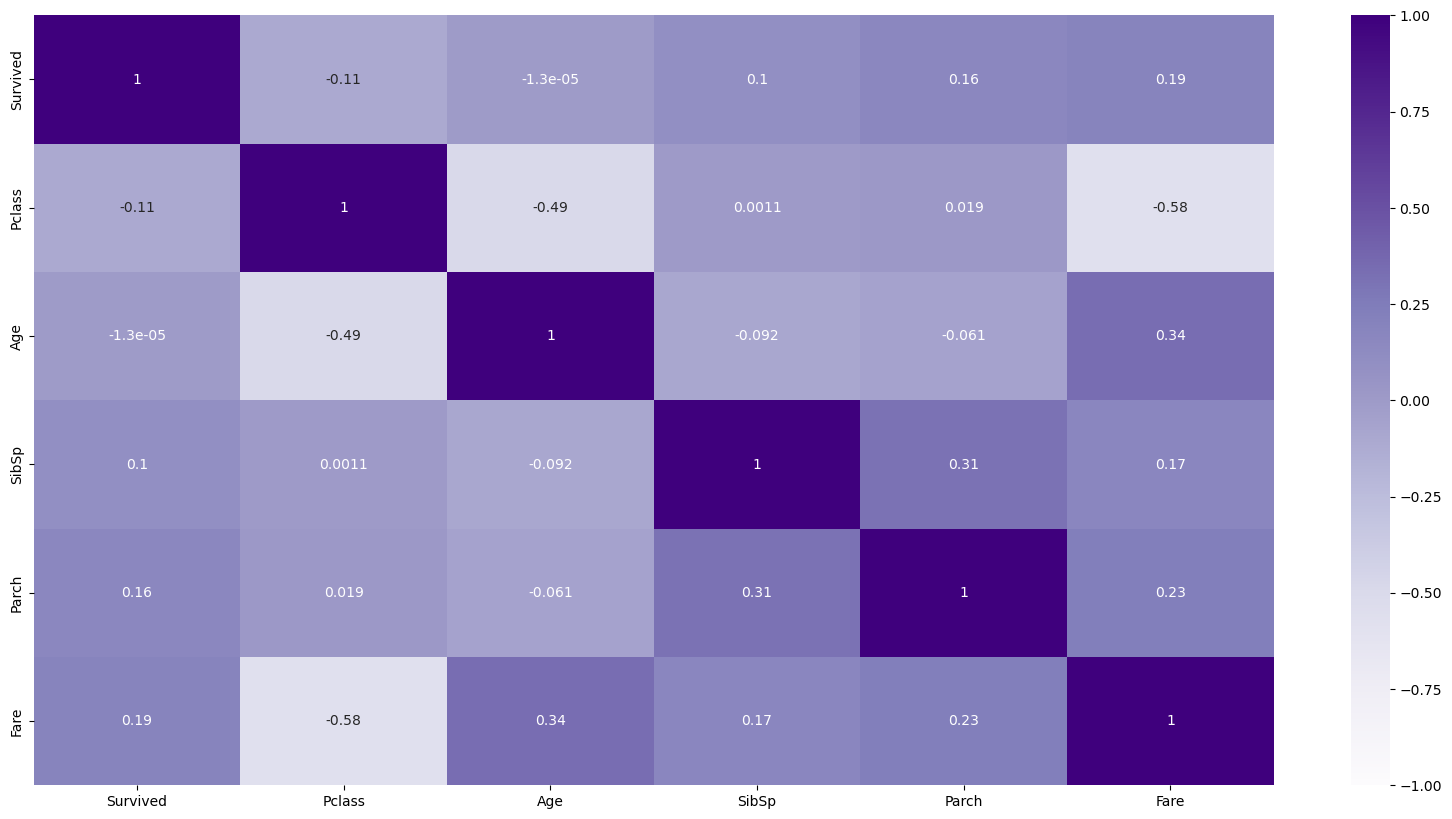

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df_num.corr(), vmax=1, vmin=-1,cmap='Purples', annot=True)
plt.show()

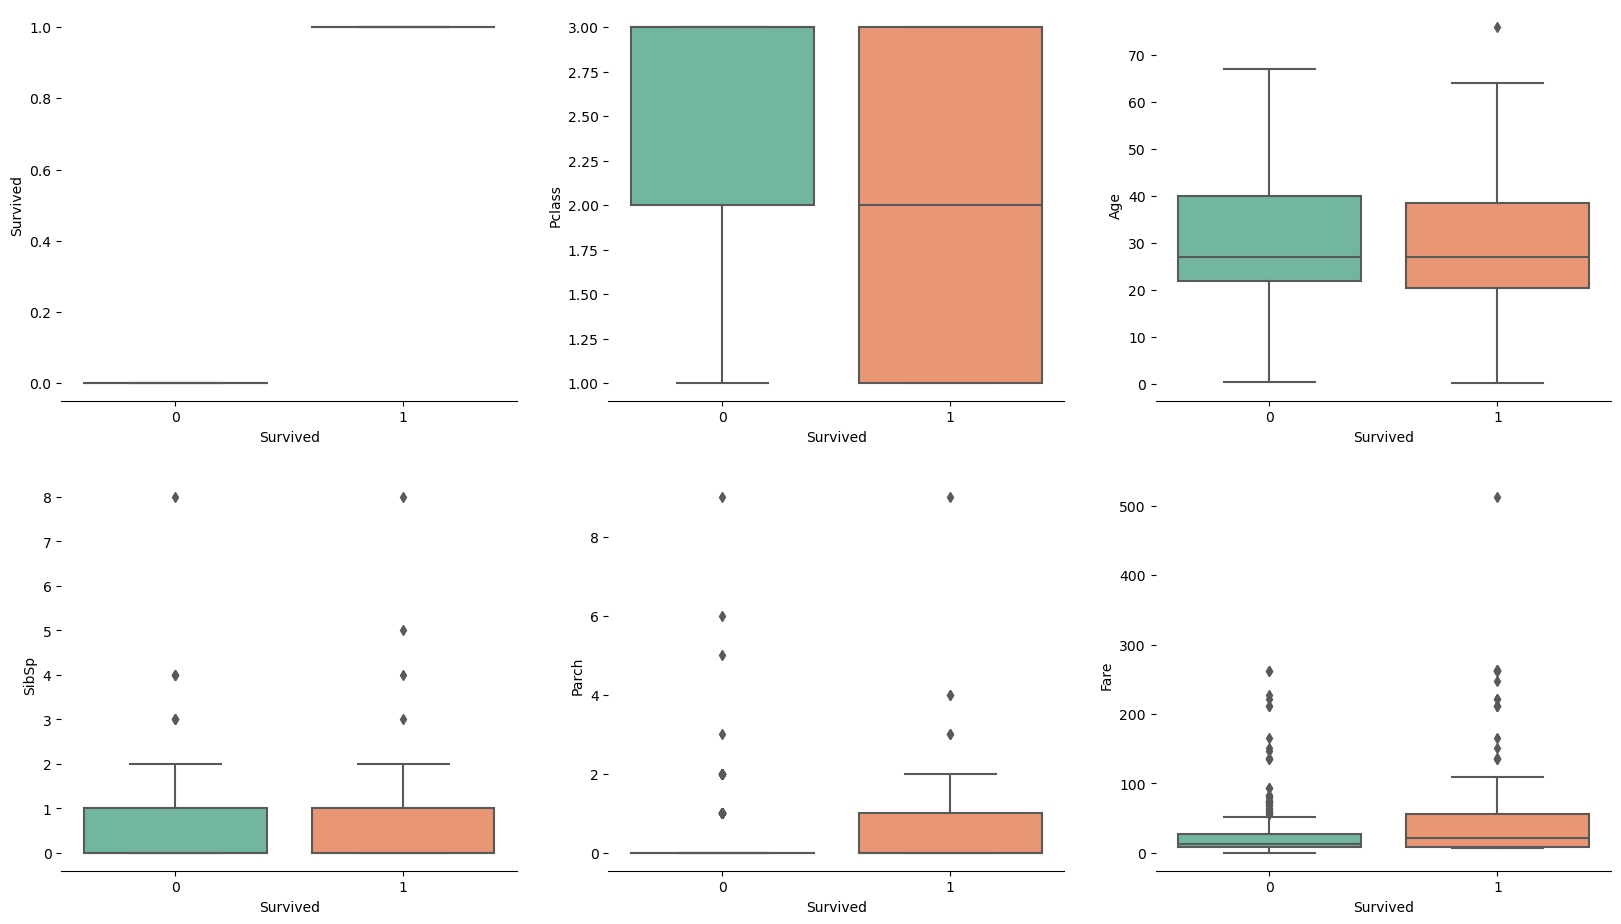

In [21]:
numeric_columns = df_num.columns
plt.figure(figsize=(20, 60))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='Survived',y= df[variable], data=df)     
        sns.despine(top=True,right=True,left=True) 

<Figure size 2000x6000 with 0 Axes>

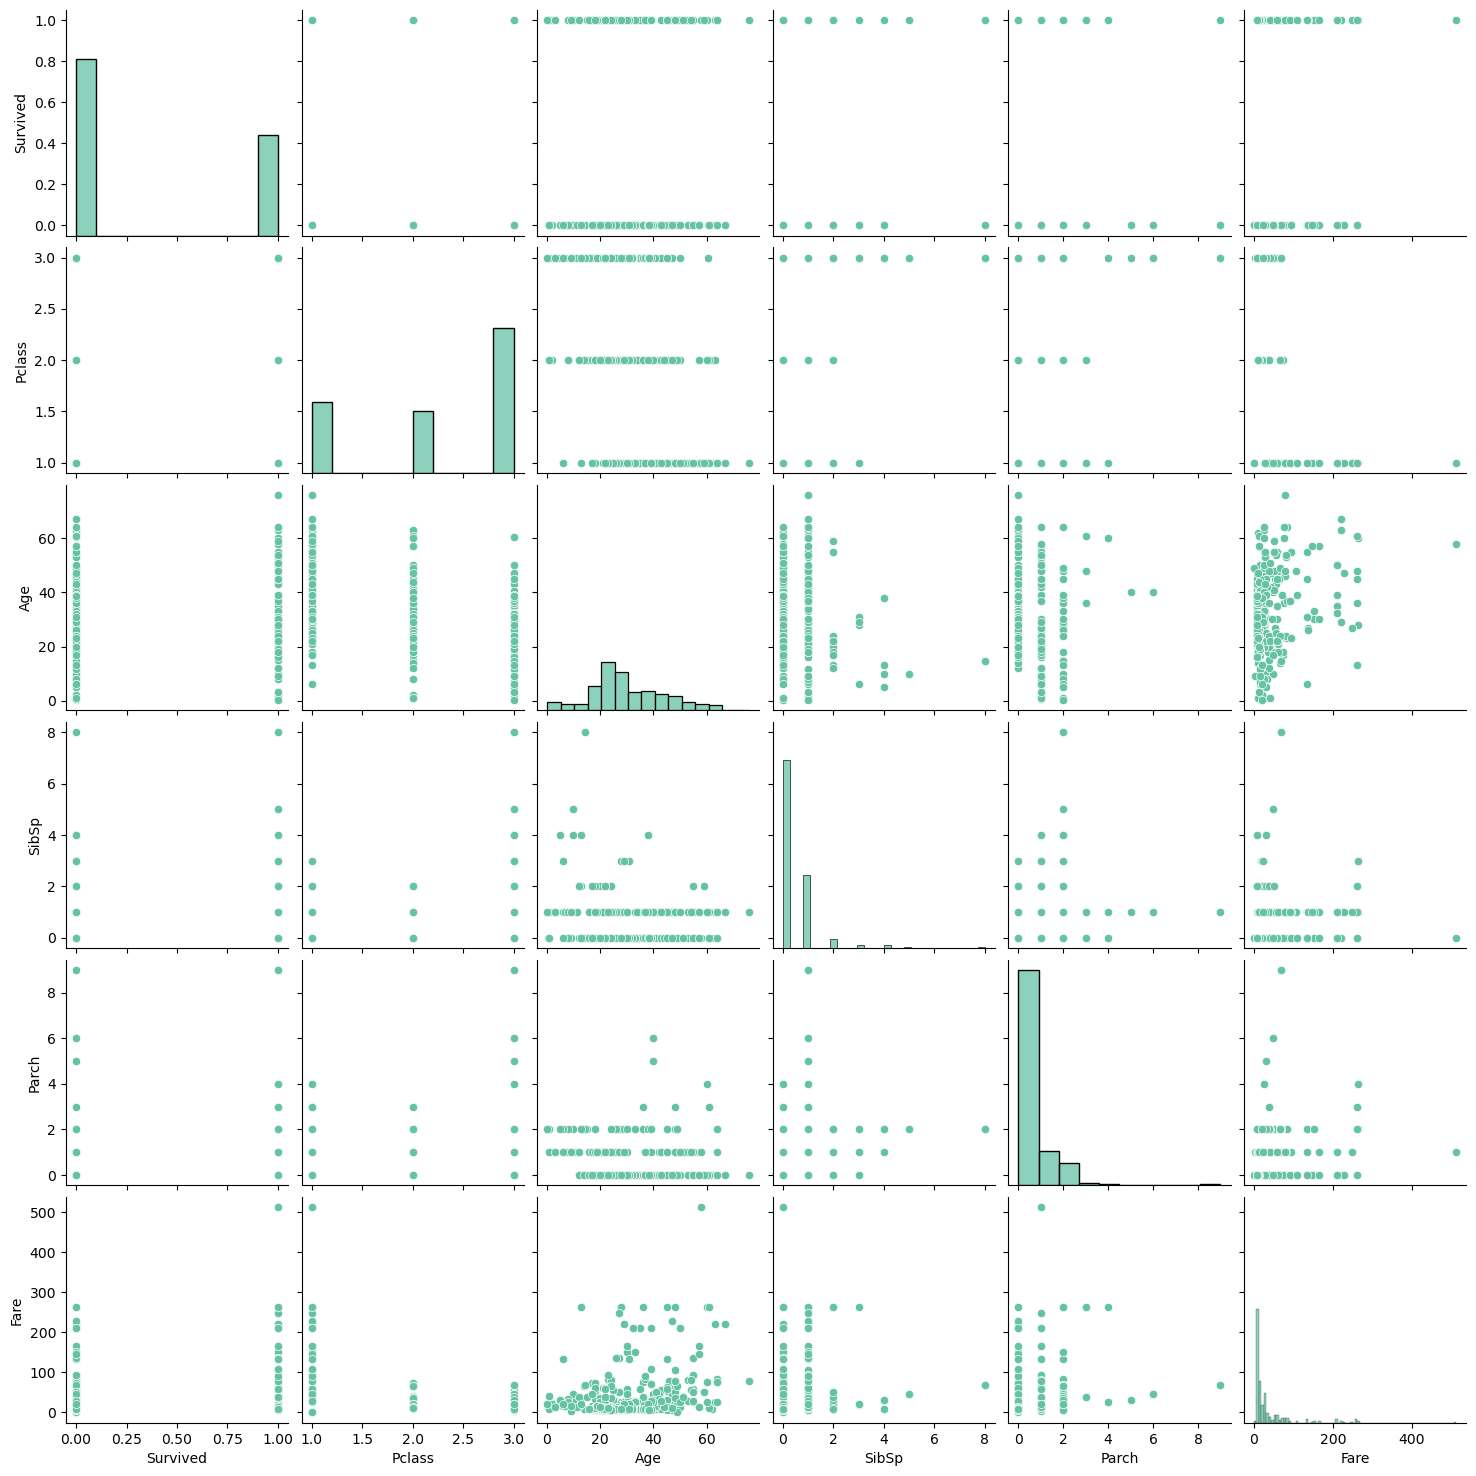

In [22]:
plt.figure(figsize=(20, 60))
sns.pairplot(df)
plt.show()

# Missing Value Treatment

In [23]:
import missingno as ms

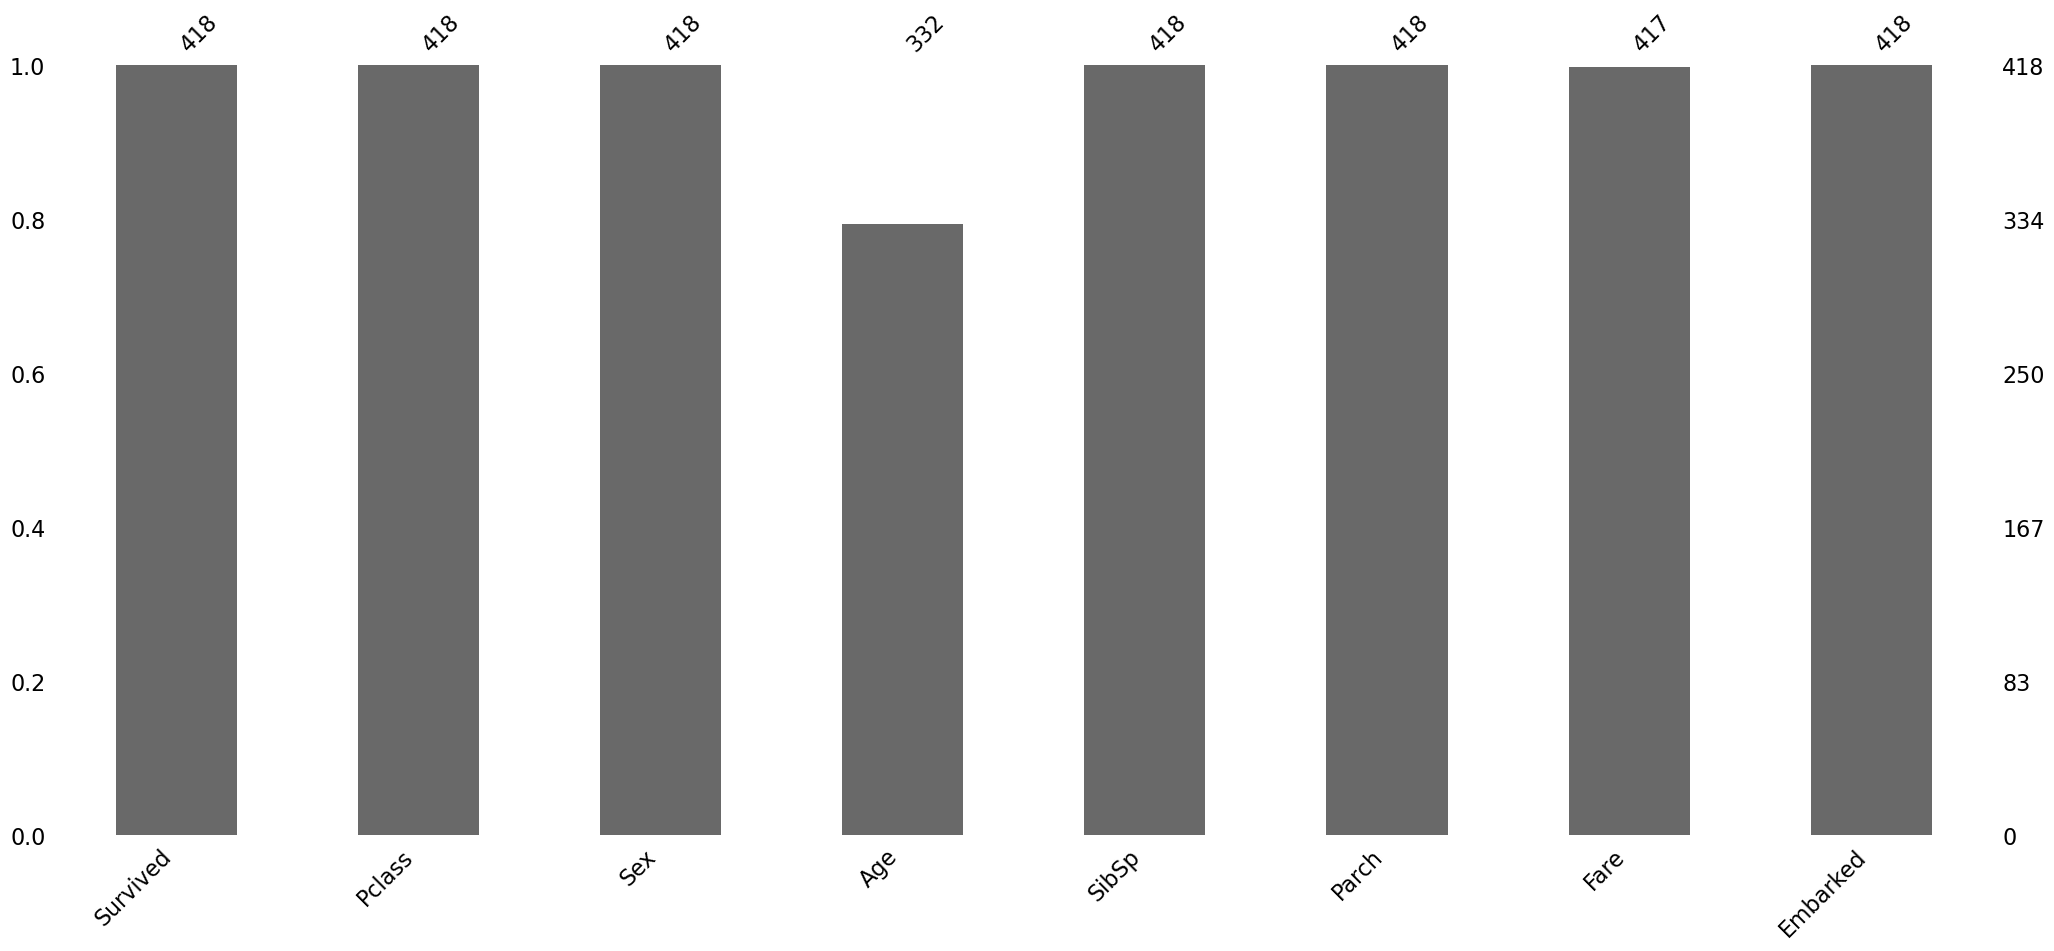

In [24]:
ms.bar(df)
plt.show()

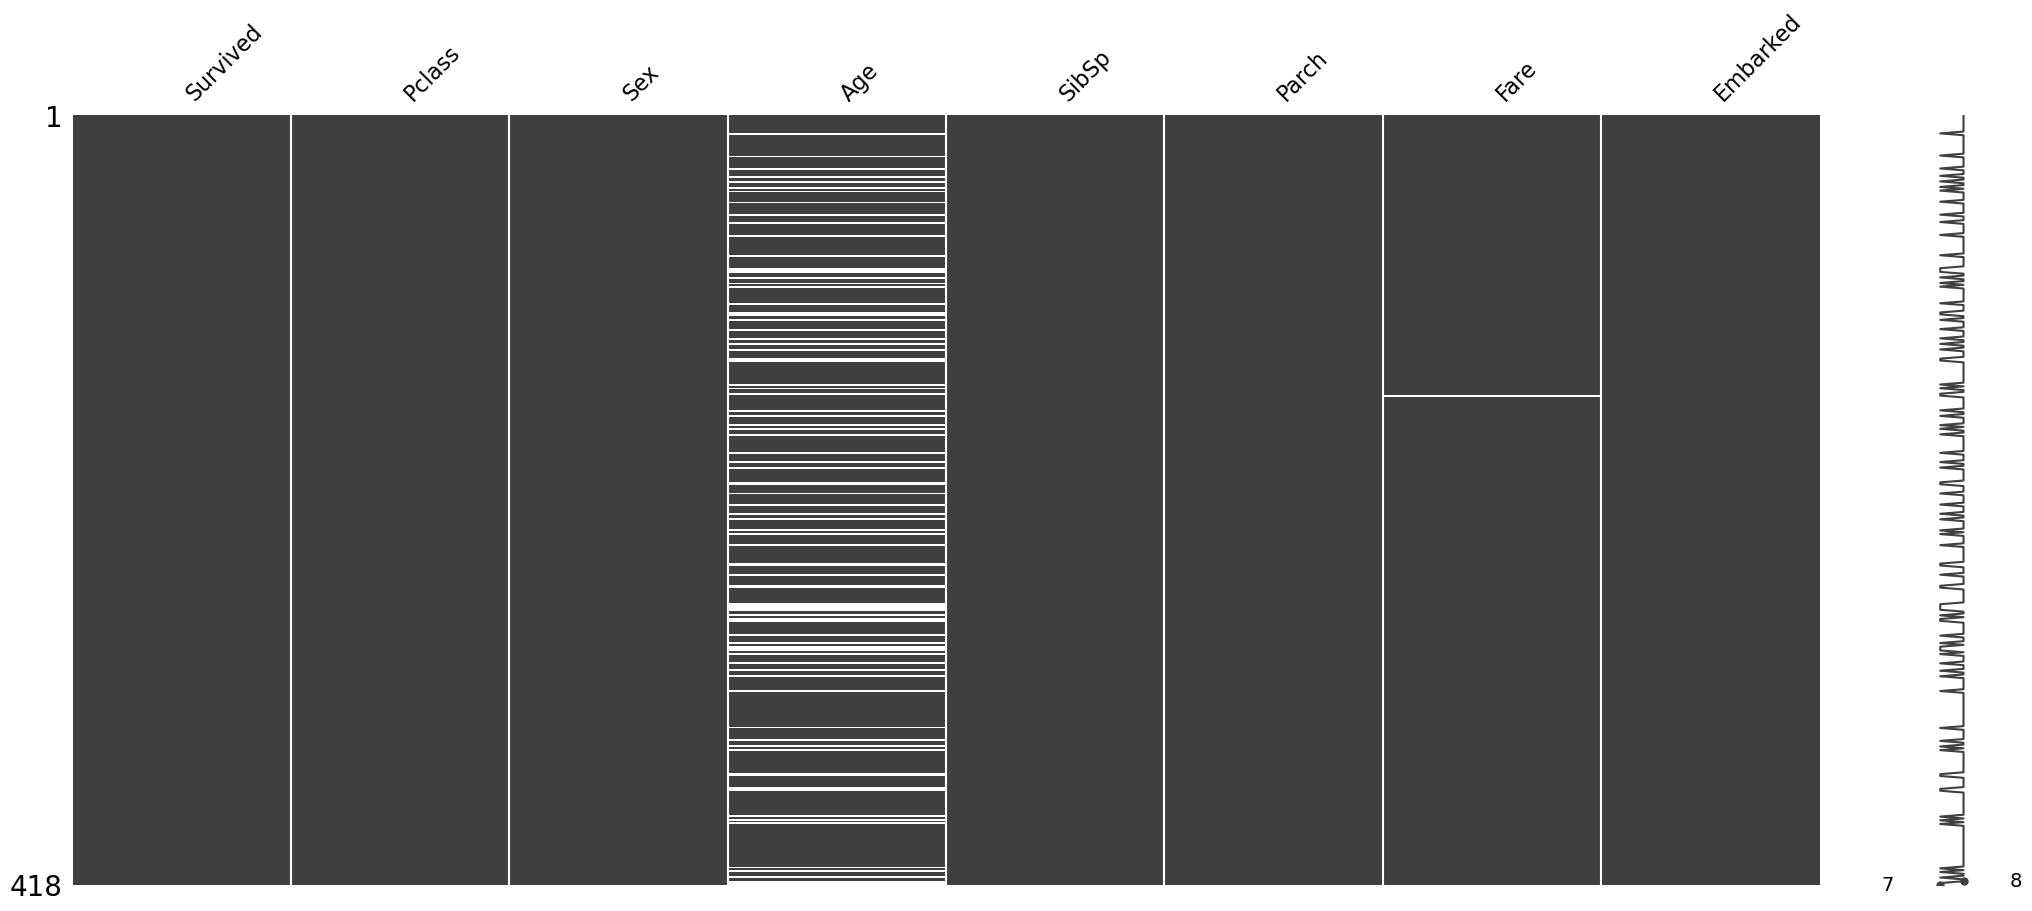

In [25]:
ms.matrix(df)
plt.show()

In [26]:
def missing_value_percentage(df):
    missvalcount = df.isnull().sum()
    missvalpercent = round(df.isnull().sum() / df.shape[0] * 100)
    dtypes = df.dtypes
    newdf = pd.concat([missvalcount, missvalpercent, dtypes], axis=1)
    newdf.columns = ['missvalcount', 'missval%', 'dtype']
    newdf = newdf[newdf['missvalcount'] != 0].sort_values(by='missvalcount', ascending=False)
    return newdf

In [27]:
missing_value_percentage(df)

,missvalcount,missval%,dtype
Age,86,21.0,float64
Fare,1,0.0,float64


### Missing values treatment for numerical variable

In [28]:
num_names = ['Age','Fare']
for col in num_names:
    df[col] = df[col].fillna(df[col].median())

In [29]:
missing_value_percentage(df)

,missvalcount,missval%,dtype


In [30]:
df_cat2 = df.select_dtypes(include='object')
df_num2 = df.select_dtypes(exclude='object')

# Outliers Analysis

## Discovery of Outliers

In [31]:
Q1 = df_num2.quantile(0.25) 
Q3 = df_num2.quantile(0.75) 
IQR = Q3 - Q1 

outlier = ((df_num2 < (Q1 - 1.5 * IQR)) | (df_num2 > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    num_outliers = len(outlier[outlier[i] == True][i])
    if num_outliers > 0:
        print(f'Total number of outliers in column {i} are {num_outliers}')

Total number of outliers in column Age are 36
Total number of outliers in column SibSp are 11
Total number of outliers in column Parch are 94
Total number of outliers in column Fare are 55


## Visualizing outliers using Boxplots & distplot

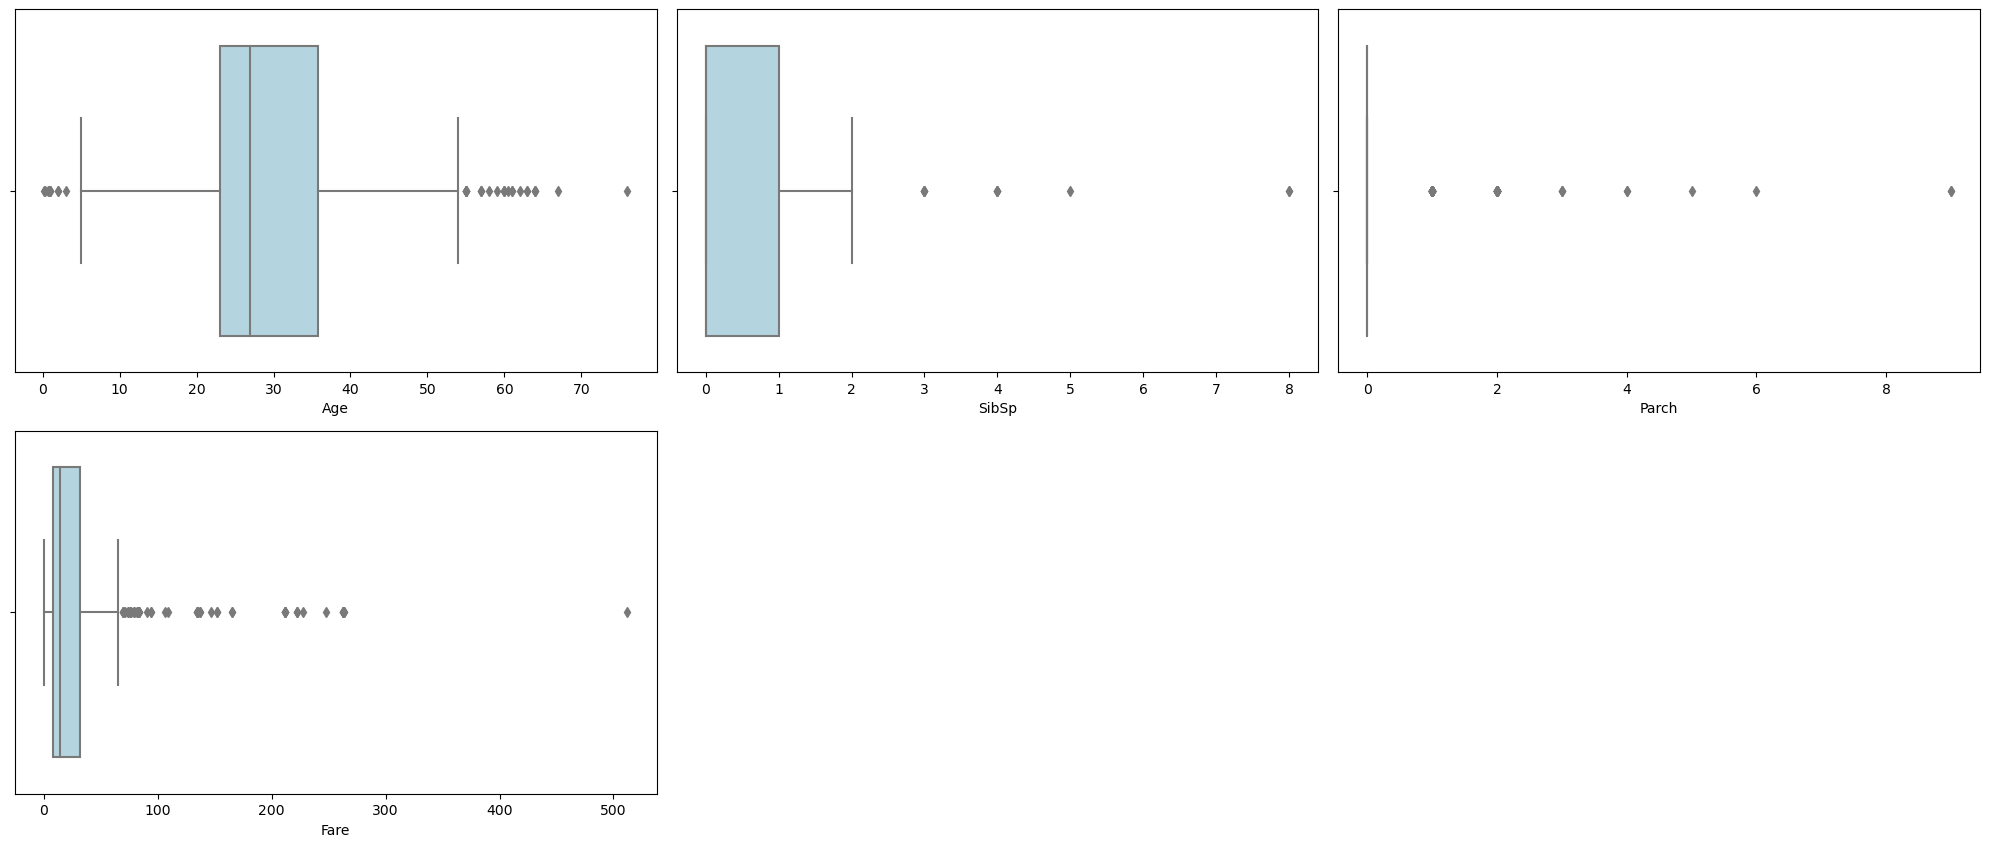

In [32]:
columns_to_plot = ['Age','SibSp','Parch','Fare']
plt.figure(figsize=(20, 25))
for i,col_name in enumerate(columns_to_plot,1):
    plt.subplot(6,3,i)
    sns.boxplot(x=df[col_name],color='lightblue')
    plt.tight_layout()
plt.show()

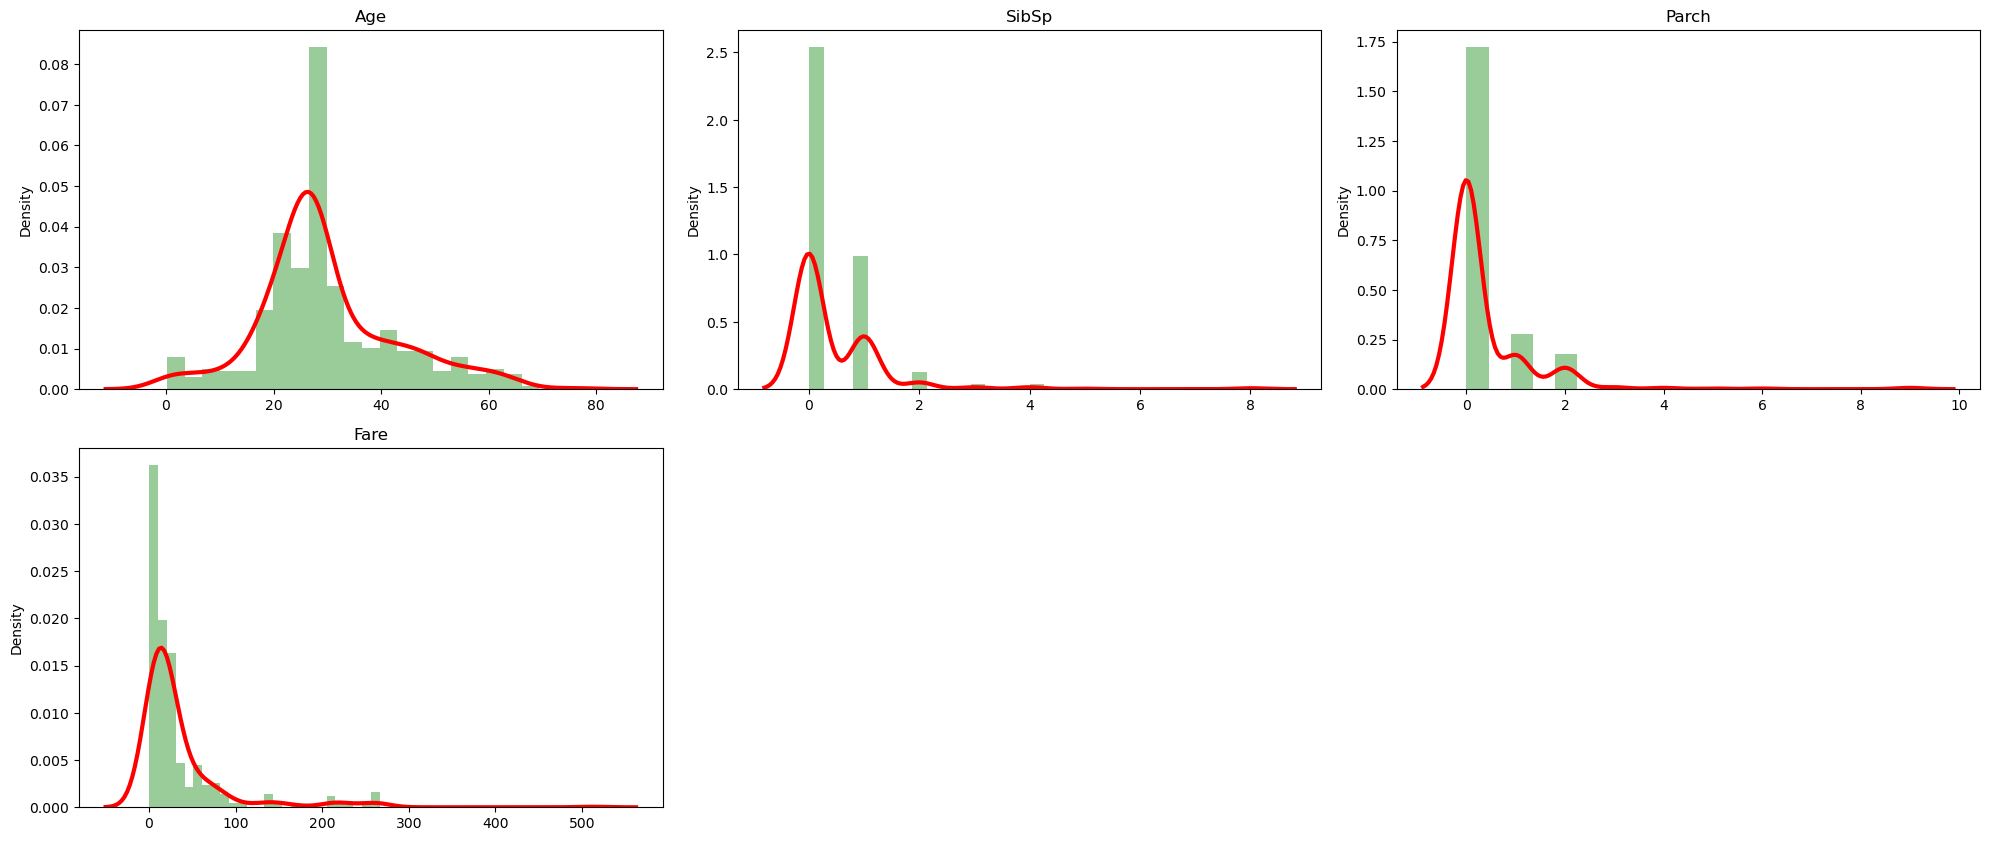

In [33]:
plt.figure(figsize=(20,25))
for i,col_name in enumerate(columns_to_plot,1):
    plt.subplot(6,3,i)
    sns.distplot(x=df[col_name],color='green',kde_kws={'color': 'red', 'lw': 3})
    plt.title(col_name)
plt.tight_layout()
plt.show()

## Removal of Outliers

In [34]:
def outlier(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    filtered_value = df[(df[column_name] > lower_limit) & (df[column_name] < upper_limit)]
    return filtered_value 

In [35]:
df2 = outlier(df,  "Age")  
df3 = outlier(df2, "SibSp")   
df5 = outlier(df3, "Fare")  

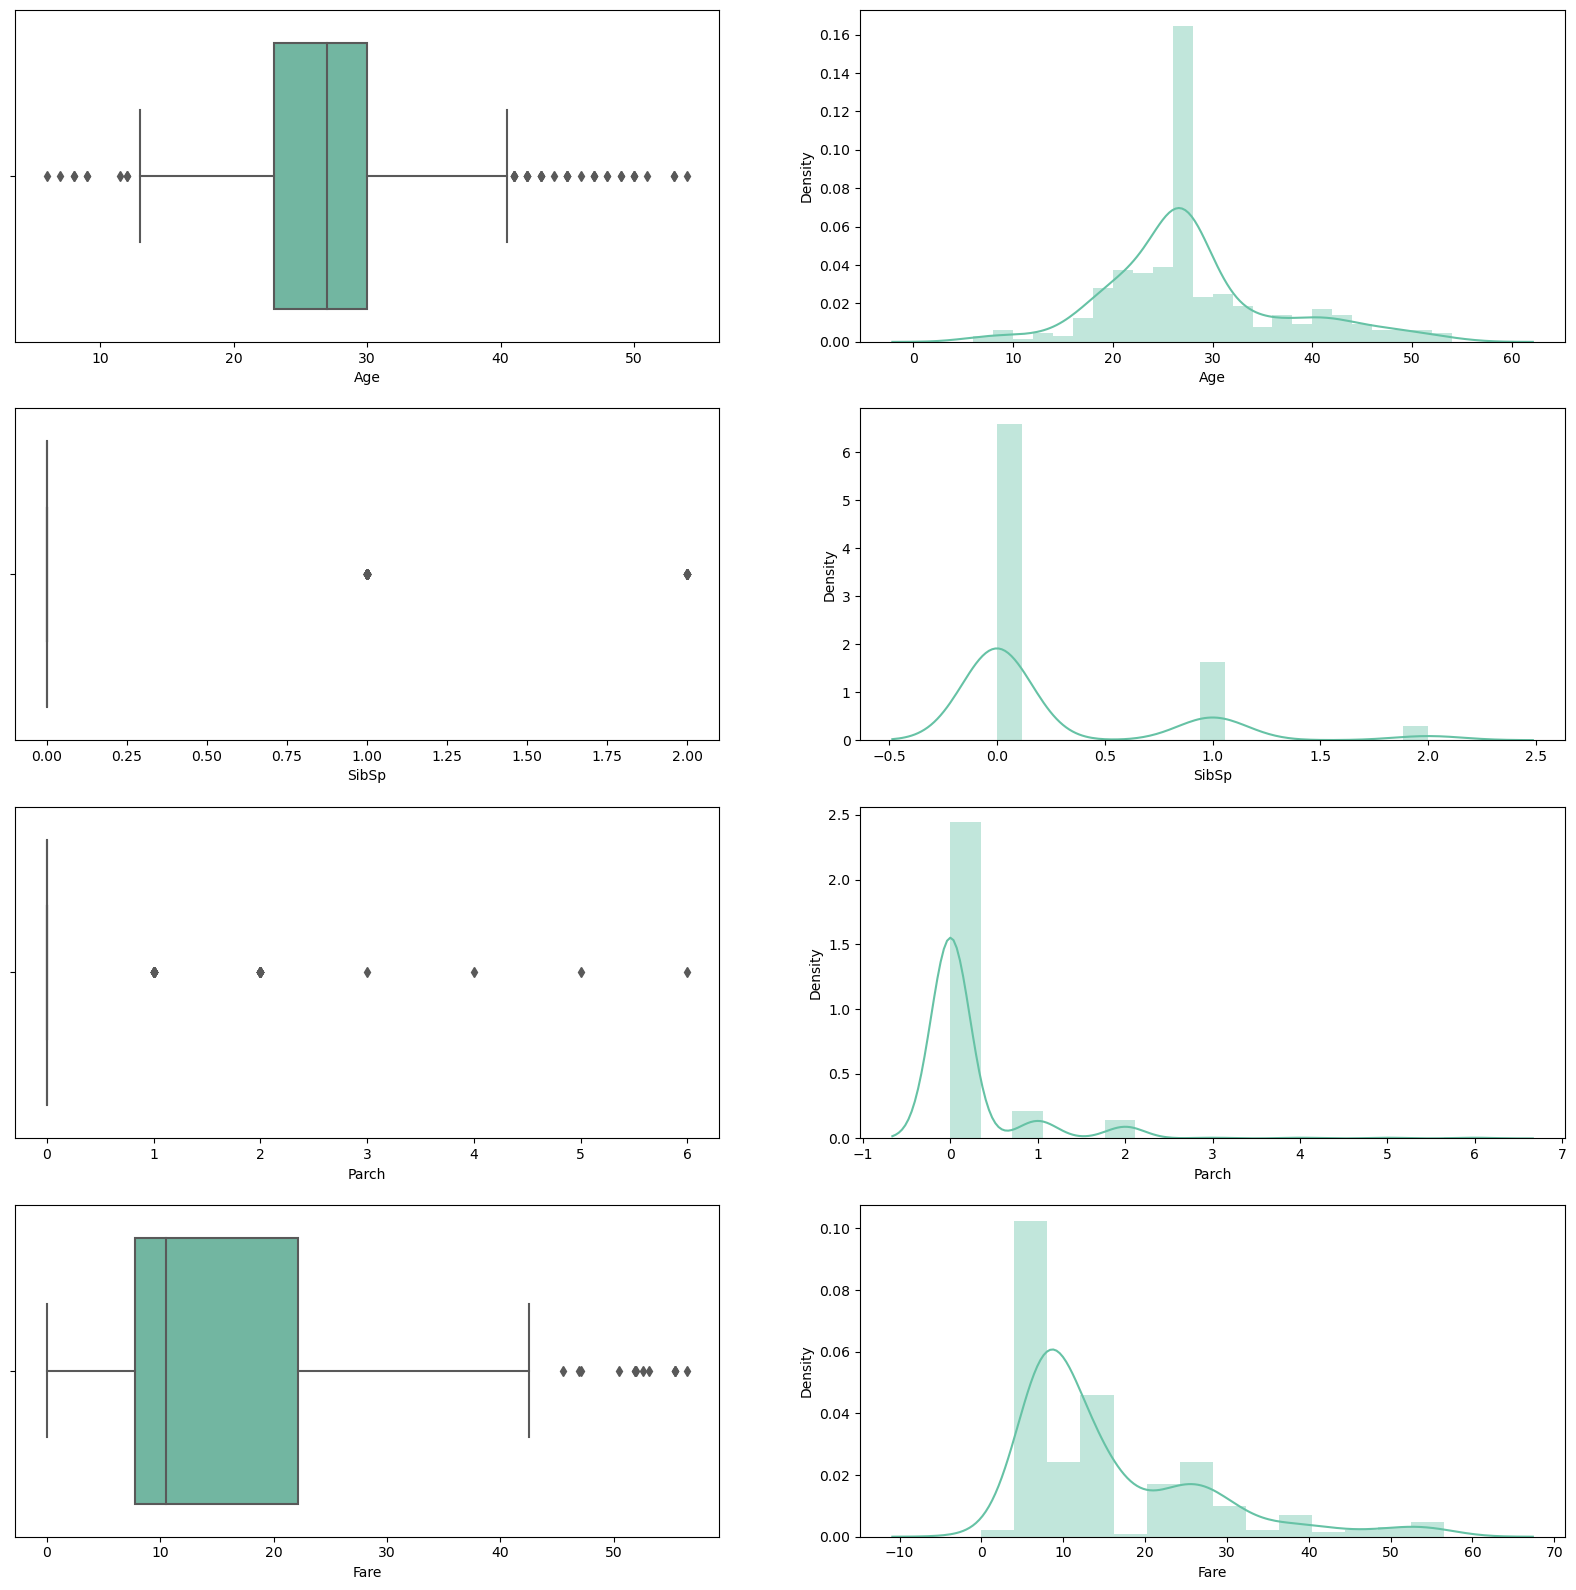

In [36]:
plt.figure(figsize=(20, 25))
plt.subplot(5,2,1)
sns.boxplot(x=df5["Age"])
plt.subplot(5,2,2)
sns.distplot(df5["Age"])
plt.subplot(5,2,3)
sns.boxplot(x=df5["SibSp"])
plt.subplot(5,2,4)
sns.distplot(df5["SibSp"])
plt.subplot(5,2,5)
sns.boxplot(x=df5["Parch"])
plt.subplot(5,2,6)
sns.distplot(df5["Parch"])
plt.subplot(5,2,7)
sns.boxplot(x=df5["Fare"])
plt.subplot(5,2,8)
sns.distplot(df5["Fare"])
plt.show()

# Data Scaling and Transformation

In [37]:
df = df5.copy()

In [38]:
categorical_columns = ['Sex','Embarked']
for column in categorical_columns:
    df[column] = LabelEncoder.fit_transform(df[column])

In [39]:
columns_to_scale = ['Age','Fare']
for column in columns_to_scale:
    df[column] = standard_scale.fit_transform(df[[column]])

In [40]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.773293,0,0,-0.701307,1
1,1,3,0,2.240581,1,0,-0.773567,2
3,0,3,1,-0.107080,0,0,-0.628689,2
4,1,3,0,-0.693995,1,1,-0.312790,2
5,0,3,1,-1.633059,0,0,-0.579670,2
...,...,...,...,...,...,...,...,...
412,1,3,0,0.010303,0,0,-0.706030,2
413,0,3,1,-0.107080,0,0,-0.682065,2
415,0,3,1,1.242825,0,0,-0.751781,2
416,0,3,1,-0.107080,0,0,-0.682065,2


In [41]:
Features = df.drop('Survived',axis = 1)
Target = df['Survived']

Features = sm.add_constant(Features)

Xtrain, xtest, Ytrain, ytest = train_test_split(Features,Target,test_size=0.20, random_state=10)

print(f'Xtrain {Xtrain.shape}')
print(f'Ytrain {Ytrain.shape}')

print(f'xtest {xtest.shape}')                        
print(f'ytest {ytest.shape}')

Xtrain (255, 8)
Ytrain (255,)
xtest (64, 8)
ytest (64,)


#  Model Building

## Logistic Regression

In [42]:
logreg = sm.Logit(Ytrain,Xtrain).fit()
logreg.summary()

         Current function value: 0.000000
         Iterations: 35


C:\Users\kumar\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\kumar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  255
Model:                          Logit   Df Residuals:                      247
Method:                           MLE   Df Model:                            7
Date:                Sun, 07 Jan 2024   Pseudo R-squ.:                   1.000
Time:                        21:02:10   Log-Likelihood:            -1.7487e-07
converged:                      False   LL-Null:                       -157.02
Covariance Type:            nonrobust   LLR p-value:                 6.055e-64
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.2739   4.83e+04      0.001      0.999   -9.46e+04    9.47e+04
Pclass        -4.8296   1.31e+04     -0.000      1.000   -2.57e+04    2.57e+04
Sex          -50.8183   3.13e+04     -0.002      0.999   -6.14e+04    6.13e+04
Age           -0.3926   1881.930     -0.000      1.000   -3688.907    3688.122
SibSp          3.7438   1.31e+04      0.000      1.000   -2.57e+04    2.57e+04
Parch          0.7182   4754.957      0.000      1.000   -9318.826    9320.262
Fare          -3.4944   8214.307     -0.000      1.000   -1.61e+04    1.61e+04
Embarked      -1.9729   9604.843     -0.000      1.000   -1.88e+04    1.88e+04
==============================================================================

Complete Separation: The results show that there iscomplete separation or perfect prediction.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

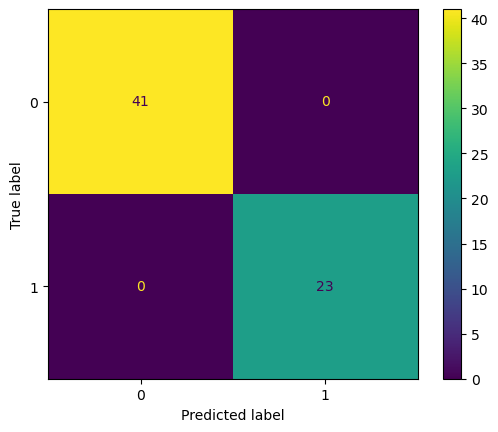

In [43]:
y_pred_prob = logreg.predict(xtest)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
cm = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [44]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        23

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



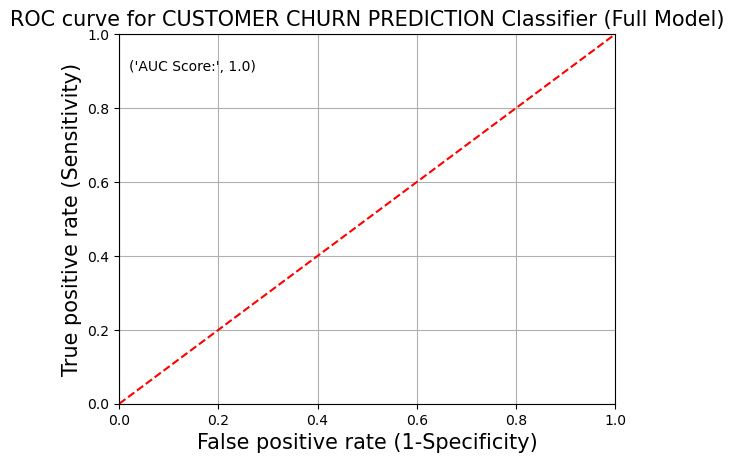

In [45]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for CUSTOMER CHURN PREDICTION Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, y_pred_prob),4)))
plt.grid(True)

In [46]:
youdens_table = pd.DataFrame({'TPR': tpr,'FPR': fpr,'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,1.000000,0.000000,9.999808e-01,1.000000
1,0.565217,0.000000,1.000000e+00,0.565217
2,1.000000,0.560976,4.603126e-13,0.439024
3,0.391304,0.000000,1.000000e+00,0.391304
4,1.000000,0.658537,4.239041e-13,0.341463


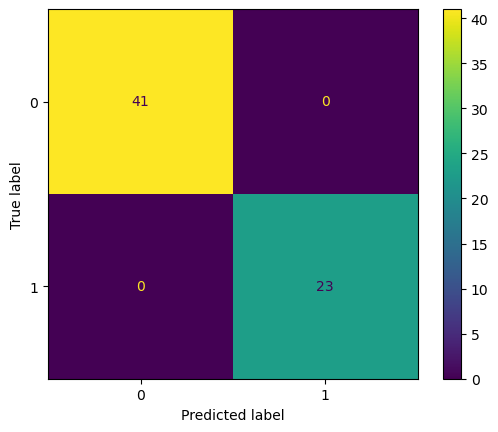

In [47]:
y_pred_youden = [ 0 if x < 9.999808e-01 else 1 for x in y_pred_prob]
cm = confusion_matrix(ytest, y_pred_youden)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [48]:
print(classification_report(ytest, y_pred_youden))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        23

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [49]:
lg = LogisticRegression()
lg.fit(Xtrain,Ytrain)
y_pred_train = lg.predict(Xtrain)
y_pred_test= lg.predict(xtest)
Logistic_train_accuracy = accuracy_score(Ytrain,y_pred_train)
Logistic_test_accuracy = accuracy_score(ytest,y_pred_test)
print('Logistic Regression:')
print("Training Accuracy:",Logistic_train_accuracy)
print("Test Accuracy:",Logistic_test_accuracy)

Logistic Regression:
Training Accuracy: 1.0
Test Accuracy: 1.0


In [50]:
scores = cross_val_score (lg, Xtrain, Ytrain, cv=5)
print("Cross-Validation Scores: ", scores)
print("Mean Cross-Validation Score: ", np.mean (scores))

print('All scores: ', scores)
print("\nMinimum score obtained: ", round (min(scores), 4)) 
print("Maximum score obtained:",    round (max (scores), 4))
print("Average score obtained: ",   round (np.mean (scores), 4))

Cross-Validation Scores:  [1. 1. 1. 1. 1.]
Mean Cross-Validation Score:  1.0
All scores:  [1. 1. 1. 1. 1.]

Minimum score obtained:  1.0
Maximum score obtained: 1.0
Average score obtained:  1.0


# Important Features

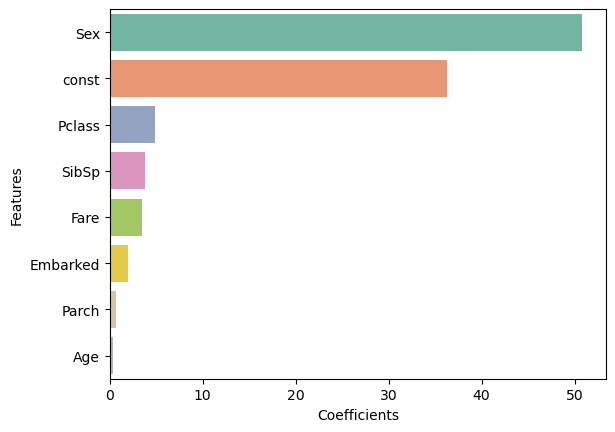

In [51]:
coefficients = logreg.params
feature_names = Xtrain.columns

important_features = pd.DataFrame({'Features': feature_names, 'Coefficients': coefficients.abs()})
important_features = important_features.sort_values('Coefficients', ascending=False)
sns.barplot(x='Coefficients', y='Features', data=important_features)
plt.show()

# "We don't need to build another model; we already achieve good accuracy with this statistical model." 

#

#

# Conclusion

##### The statement "We don't need to build another model; we already achieve good accuracy with this statistical model." seems to be a conclusion drawn from the logistic regression analysis performed on the Titanic dataset. However, it's important to consider that the decision to use a particular model should be based on a comprehensive evaluation of various factors.

##### While the logistic regression model has been analyzed and yielded good accuracy, it's advisable to explore other models as well to ensure a robust understanding of the data and potentially improve predictive performance. Different algorithms may capture patterns in the data that logistic regression might overlook.

##### Additionally, it's crucial to assess the model's generalization to new, unseen data. Cross-validation and testing on an independent dataset could provide a more accurate measure of the model's performance.

##### In conclusion, while the current statistical model shows promise, further exploration, comparison with alternative models, and validation on additional datasets could enhance the overall reliability and effectiveness of the predictive model.